<a href="https://colab.research.google.com/github/MauriceLaf/CAP4630/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5

##General Concepts/Terms
Source/Reference: https://github.com/schneider128k/machine_learning_course/blob/master/slides/1_a_slides.pdf & https://github.com/schneider128k/machine_learning_course/blob/master/slides/1_b_slides.pdf 

**Deep Learning** - A subset of machine learning

**Machine Learning** - A subset of AI
*   "Field of study that gives computers the ability to learn without being explicitly programmed." - Arthur Samuel
*   Programs that adjust themselves based on the data that they are exposed to. 
*   Machine learning is dynamic and requires no human intervention to make changes.
*   Training a machine learning program involves giving it an input and an output to allow it to come up with the rules itself

**AI** - Umbrella term for anything that makes a machine smart.  
*   "The science and engineering of making intellignet machines." - John McCarthy
*   A branch of computer science that deals with simulation of intelligent behavior in computers
*   A system able to perform tasks that usually require human intelligence (decision making, perception, speech recognition, etc.).

**Symbolic AI** - A symobolic AI is an AI that makes a decision for some output based on an input and a set of logical rules.

**Supervised Learning** - A type of Machine Learning where the model is provided labeled training data, or in other words, training data that has the labels showing how it should be classified.

**Unsupervised learning** - A type of Machine Learning where the machine is given unlabeled data. This means the machine must find some pattern in the data itself, and receives no hint to how it should classify the data.

**Reinforcement Learning** - A type of Machine Learning that uses a reinforcement (such as a game over in a video game) to teach a machine how to do some task.


##Basic Concepts/Fundamental Concepts

###Concepts

####Linear Regression


Ref: https://github.com/schneider128k/machine_learning_course/blob/master/slides/2_b_slides.pdf 
Linear regression redefines the standard "line of best fit" approach of adding a line with an equation of: $$y = mx + b$$ by replacing it with a more complex line based on weights and features.
The equation of a line in linear regression generally follows this pattern: $$ŷ = b + w1x1 + w2x2 + ... + wn xn$$Where $n$ represents the amount of weights and features. Linear regression is essential to much of machine learning as the weights allow for a line on a graph to change easily based on new data and training data.


#####Below is a code example of Linear Regression using Keras. Reference: https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_keras.ipynb

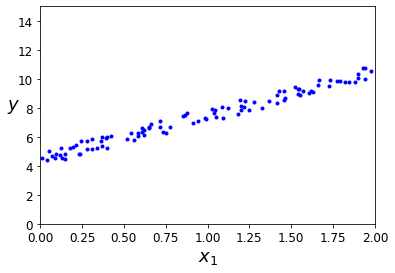

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

xs = 2 * np.random.rand(100, 1)
ys = 4 + 3 * xs + np.random.rand(100, 1)

plt.plot(xs, ys, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# split the data into training and test sets
# train set
train_xs = xs[:80]
train_ys = ys[:80]
# test set
test_xs = xs[80:]
test_ys = ys[80:]

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 37.8921 - mse: 37.8921
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 16.6152 - mse: 16.6152
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 7.3592 - mse: 7.3592
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 3.3853 - mse: 3.3853
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 1.6664 - mse: 1.6664
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9157 - mse: 0.9157
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5828 - mse: 0.5828
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.4301 - mse: 0.4301
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.3536 - mse: 0.3536
Epoch 10/10
1/1 [==============================] - 0s 865us/step - loss: 0.3264 - mse: 0.3264
Test Accuracy  0.32638755440711975


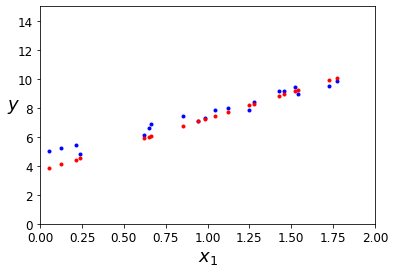

In [2]:
%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(1, input_shape=(1,)))

network.compile(optimizer='sgd', loss='mse', metrics=['mse'])

network.fit(train_xs, train_ys, epochs=10, batch_size=8)

test_loss, test_acc = network.evaluate(test_xs, test_ys)

print("Test Accuracy ", test_acc)

pred_ys = network.predict(test_xs)

plt.plot(test_xs, test_ys, "b.")
plt.plot(test_xs, pred_ys, "r.") # predicted values
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

####Gradients/Gradient Descent

Ref: https://github.com/schneider128k/machine_learning_course/blob/master/slides/2_e_slides.pdf 

#####Gradients

The gradient is a vector who's values can be calculated from partial derivatives of the loss function in respect to the weights.

#####Gradient Descent

**Gradient Descent** is the calculation of the loss function along a curve.

There are multiple types of gradient descent, among those are stochastic gradient descent, full batch gradient descent, and mini-batch stochastic gradient descent.

**Stochastic gradient descent** uses a single batch per iteration, in other words, a much more random average is achieved from a single data set.

**Full-batch gradient descent** is gradient descent that goes through and puts each example in the batch per iteration. This is inefficient in that is takes a very long time, and isn't very random. 

**Mini-batch stochastic gradient descent** is a compromise between full-batch iteration (not randomly choosing a single batch per iteration), and stochastic gradient descent. This means it has some amount of batches, but not all of the examples are included. Mini-batch has less noise than SGD, but is still more efficient than full-batch.

#####An example for both gradients and gradient descent is visible in HW2 Problem 2.
In this homework, I used MBSGD, and also graphed the gradient descent for better data clarity.

Ref: https://colab.research.google.com/drive/1t8xBuH2ChySzSvQ54ztEQe9T-r-TaOqR 

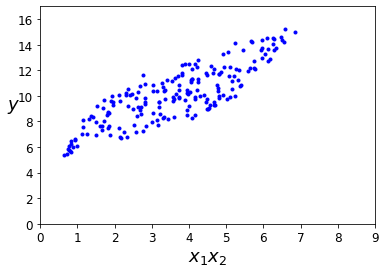

In [3]:
#####SAMPLE POINTS#####

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# generate m random pairs (x, y)

m = 200
X = 2 * np.random.rand(m, 1)
#New Value
X2 = 5 * np.random.rand(m, 1)
#Add New Value X2
y = (4 + 3 * X + 1 * X2) + np.random.rand(m, 1)
#Plot Points With New Value X2
plt.plot(X + X2, y, "b.")
plt.xlabel("$x_1 x_2$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 9, 0, 17])
plt.show()

In [4]:
#####INITIAL WEIGHTS#####
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
# Shift Initial Weight
initial_weight = np.random.randn(3, 1)
print(initial_weight)
# add x0 = 1 
# Add x1 = X and x2 = X2
X_b = np.column_stack([np.ones((m, 1)), X, X2])

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


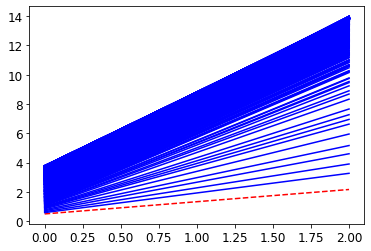

In [5]:
#####DETERMINE WEIGHTS AND GRAPH PREDICTIONS#####
weight = initial_weight
weight_path_mgd = []
batch_size = 4

#Create matrices for X_new and X2_new
X_new = np.array([[0], [2]])
X2_new = np.array([[0], [3]])
#Create X_new_b from X and X2
X_new_b = np.column_stack([np.ones((2, 1)), X_new, X2_new])
y_predict = X_new_b.dot(weight)
plt.plot(X_new, y_predict, "r--")

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)
        # Y Prediction based on new X_new_b (with 2 weights and base value)
        y_predict = X_new_b.dot(weight) 
        plt.plot(X_new, y_predict, "b-")

In [0]:
def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

array([[3.8024167 ],
       [3.34281256],
       [1.10179316]])

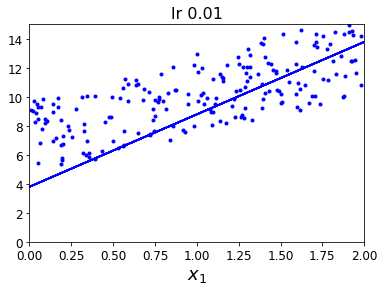

In [7]:
#####PLOT GRADIENT DESCENT*****
plot_gradient_descent(weight, lr, weight_path=weight_path_mgd)
weight_path_mgd[-1]

####Logistic Regression

Logistic Regression is used for binary classification problems, meaning problems that only have two classes. 

Logistic Regression uses a sigmoid activation function, and calculates loss using binary cross entropy loss. 

Logistic Regression is very useful for dividing things that are easily named as one thing or another, such as a dog or a cat. 



**Two code examples for logistic regression are visible in the Python Libraries Section, under both NumPy and TensorFlow/Keras**

###Python Libraries

A large portion of this class was becoming familiar with different libraries in order to be able to use them to perform given Machine Learning tasks. Among these libraries are NumPy, Keras, and Tensorflow. 

####NumPy
NumPy is arguably one of the most useful libraries in Python, having the ability to perform several mathematical functions that can be used to "code from scratch" different Machine Learning concepts such as linear regression, matrix operations, and other things.

Ref: https://colab.research.google.com/drive/1ZMCA-ya1PPSK7r4eJQa7Q67Ul6eebBPS 

#####Below is prerequisite code for the sample NumPy code

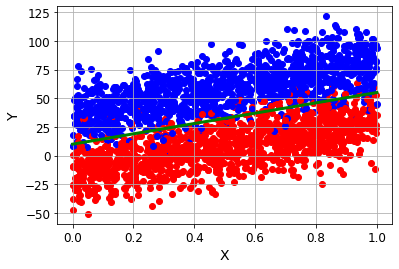

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from random import *
import matplotlib.patches as mpatches

def get_random_data(w, b, mu, sigma, m):

  data_hold = []
  labels_hold = []
  i = 0

  # Do m cycles to have m arrays
  while (i < m):
    ran_c = random()
    # Generate c randomly
    if (ran_c > 0.5):
      c = 1
    else:
      c = 0

    # Get a uniform x and a normal n
    x_1 = np.random.uniform(low=0.0, high=1.0)
    n = np.random.normal(mu, sigma, 1)

    # Calcualte y
    x_2 = w * x_1 + b + (np.power(-1, c)) * n
    # Append to lists to sort later
    data_hold.append([x_1, x_2[0]])
    labels_hold.append([c])
    i += 1

  # Convert lists into np arrays
  data = np.array(data_hold, ndmin=2)
  labels = np.array(labels_hold, ndmin=1)
  training_ind = int(m * 0.8)
  test_ind = m - (m - training_ind) + 1
  return(data, labels)

def display_random_data(data, labels, w, b):

  # Get the x and y points
  points = np.column_stack(data)
  x_s = points[0]
  y_s = points[1]

  plt.xlabel('X', color='black')
  plt.ylabel('Y', color='black')
  plt.grid()

  # Combine together x, y, and c to accuratley plot them
  for point_and_label in zip(x_s, y_s, labels):
    if (point_and_label[2] == 0):
      plt.scatter(point_and_label[0], point_and_label[1], color='blue')
    else:
      plt.scatter(point_and_label[0], point_and_label[1], color='red')

  # Plots the line
  x = np.linspace(0, 1)
  y = w * x + b

  plt.plot(x, y, color='green', linewidth = 3)

data, labels = get_random_data(45, 10, 25, 15, 2500)

display_random_data(data, labels, 45, 10)

#divide training and testing data
train_data = data[0:2000]
train_labels = labels[0:2000]

partial_train_data = train_data[0:1000]
partial_train_labels = train_labels[0:1000]

x_val = train_data[1000:2000]
y_val = train_labels[1000:2000]

test_data = data[2000:2500]
test_labels = labels[2000:2500]

#####HW3 Problem 3 || Using NumPy to implement logistic regression. 
NumPy is used heavily to access mathematical operations such as exponents, logarithms, dot products, etc. to create the sigmoid, loss, and prediction functions. NumPy is also used for weight updating as well as for graphing some of the data in this (rather long) example.

In [9]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#NumPy implementation of 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss_cross_entropy(y_predicted, t):
    return -np.mean(t*np.log(y_predicted)+(1-t)*np.log(1-y_predicted))

def predict(X):
    preds = []
    for i in sigmoid(np.dot(X, W) + b):
        if i>0.5:
            preds.append(1)
        else:
            preds.append(0)
    return preds

np.random.seed(0)
W = np.random.uniform(0,1,size=(train_data.shape[1],1))
b=0.5

train_data = data[0:2000]
train_labels = labels[0:2000]

partial_train_data = train_data[0:1000]
partial_train_labels = train_labels[0:1000]

x_val = train_data[1000:2000]
y_val = train_labels[1000:2000]

test_data = data[2000:2500]
test_labels = labels[2000:2500]

loss_history = []

for i in range(2500):
    Z = np.dot(train_data, W) + b
    Y_output = sigmoid(Z)
    curr_loss = loss_cross_entropy(Y_output,train_labels)
    loss_history.append(curr_loss)
    #print("Current Loss ->",curr_loss)
    grad= Y_output - train_labels
    grad_weight= np.dot(train_data.T,grad)/train_data.shape[0]
    grad_bias = np.average(grad)
    W=W-.01*grad_weight
    b=b-.01*grad_bias


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


Loss Is: 0.2107538559308915


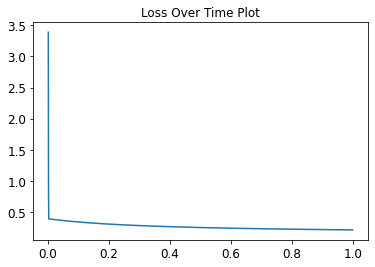

In [10]:

xAx = np.linspace(0,1, num = 2500)
plt.plot(xAx, loss_history)
plt.title("Loss Over Time Plot")
plt.show

print("Loss Is:", curr_loss)

In [11]:
def compare_labels(test, labels):
  i=0
  matches = 0
  mismatches = 0
  for label in labels:
    if test[i] == labels[i]:
      key = "MATCH"
      matches += 1
    else:
      key = "MISMATCH"
      mismatches +=1
    print(i, ": Label Prediction is:", test[i], "| Actual Label is:", labels[i], key, "| Current Accuracy:", matches / (matches+mismatches))
    i += 1
  return matches / (matches + mismatches)

predictions = predict(test_data)
accuracy = compare_labels(predictions, test_labels)
print("Actual Accuracy:", accuracy)

0 : Label Prediction is: 1 | Actual Label is: [0] MISMATCH | Current Accuracy: 0.0
1 : Label Prediction is: 1 | Actual Label is: [1] MATCH | Current Accuracy: 0.5
2 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 0.6666666666666666
3 : Label Prediction is: 1 | Actual Label is: [1] MATCH | Current Accuracy: 0.75
4 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 0.8
5 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 0.8333333333333334
6 : Label Prediction is: 0 | Actual Label is: [1] MISMATCH | Current Accuracy: 0.7142857142857143
7 : Label Prediction is: 1 | Actual Label is: [1] MATCH | Current Accuracy: 0.75
8 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 0.7777777777777778
9 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 0.8
10 : Label Prediction is: 0 | Actual Label is: [0] MATCH | Current Accuracy: 0.8181818181818182
11 : Label Prediction is: 1 | Actual

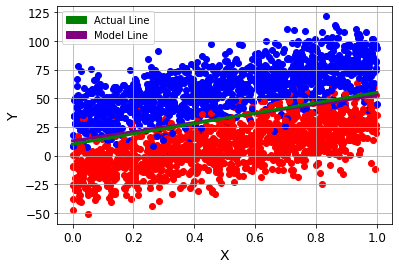

In [12]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(train_data, np.ravel(train_labels))
#b
intercept = model.intercept_
#w1 & w2
x = np.linspace(0, 1)
b1 = model.coef_
w1 = b1[0][0]
w2 = b1[0][1]
b = intercept
m = -(b / w2) / (b / w1)
y_intercept = -b / w2

y = m*x + y_intercept
plt.plot(x, y, 'purple', linewidth = 3)

p1 = mpatches.Patch(color='green', label='Actual Line')
p2 = mpatches.Patch(color='purple', label='Model Line')
plt.legend(handles=[p1,p2])

display_random_data(data, labels, 45, 10)

####Tensorflow/Keras

Tensorflow and Keras are two libraries that are essential to what we've learned in this class, as they greatly simplify many machine learning processes and "automate" coding by allowing the use of the same functions for different machine learning processes.

Keras is extremely user friendly, and is built into Python. Keras is mainly what we used in this class, and is a neural network library, while TensorFlow is an open source library that contains resources for many machine learning tasks. TensorFlow is both high and low level, while Keras focuses on the high level, which is what makes it very user friendly.

#####HW3 Problem 2 || Logistic Regression with Keras
Below is the code for HW3 Problem 2, which uses the same data as the code above. This code is much simpler and easier to understand, as training a model in Keras is as simple as calling model.fit()

Ref: https://colab.research.google.com/drive/1ZMCA-ya1PPSK7r4eJQa7Q67Ul6eebBPS 

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential

#build the model
def build():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # compile model
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  return model

model = build()

Using TensorFlow backend.


In [14]:
#divide training and testing data
train_data = data[0:2000]
train_labels = labels[0:2000]

partial_train_data = train_data[0:1000]
partial_train_labels = train_labels[0:1000]

x_val = train_data[1000:2000]
y_val = train_labels[1000:2000]

test_data = data[2000:2500]
test_labels = labels[2000:2500]

#train model
history = model.fit(x=partial_train_data,
                    y=partial_train_labels,
                    epochs=500,
                    batch_size=128,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/500
8/8 [==============================] - 0s 13ms/step - loss: 9.2036 - accuracy: 0.6540 - val_loss: 8.1896 - val_accuracy: 0.6710
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 9.1134 - accuracy: 0.6540 - val_loss: 8.1272 - val_accuracy: 0.6710
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 9.0145 - accuracy: 0.6550 - val_loss: 8.0711 - val_accuracy: 0.6710
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 9.0290 - accuracy: 0.6560 - val_loss: 8.0165 - val_accuracy: 0.6710
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 8.8968 - accuracy: 0.6560 - val_loss: 7.9639 - val_accuracy: 0.6710
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 8.8038 - accuracy: 0.6560 - val_loss: 7.9128 - val_accuracy: 0.6710
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 8.7888 - accuracy: 0.6560 - val_loss: 7.8596 - val_accuracy: 0.6710
Epoch 8/500
8/8 [=========

In [15]:
results = model.evaluate(test_data, test_labels)
preds = (model.predict(test_data) > 0.5).astype("int32")

def compare_labels(test, labels):
  i=0
  matches = 0
  mismatches = 0
  for label in labels:
    if test[i] == labels[i]:
      key = "MATCH"
      matches += 1
    else:
      key = "MISMATCH"
      mismatches +=1
    print(i, ": Label Prediction is:", test[i], "| Actual Label is:", labels[i], key, "| Current Accuracy:", matches / (matches+mismatches))
    i += 1
  return matches / (matches + mismatches)
accuracy = compare_labels(preds, test_labels)
print("Actual Accuracy:", accuracy)

16/16 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9560
0 : Label Prediction is: [1] | Actual Label is: [0] MISMATCH | Current Accuracy: 0.0
1 : Label Prediction is: [1] | Actual Label is: [1] MATCH | Current Accuracy: 0.5
2 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 0.6666666666666666
3 : Label Prediction is: [1] | Actual Label is: [1] MATCH | Current Accuracy: 0.75
4 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 0.8
5 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 0.8333333333333334
6 : Label Prediction is: [0] | Actual Label is: [1] MISMATCH | Current Accuracy: 0.7142857142857143
7 : Label Prediction is: [1] | Actual Label is: [1] MATCH | Current Accuracy: 0.75
8 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 0.7777777777777778
9 : Label Prediction is: [0] | Actual Label is: [0] MATCH | Current Accuracy: 0.8
10 : Label Prediction is:

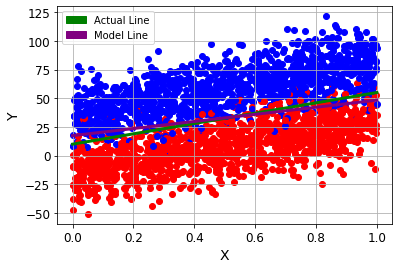

In [16]:
weights = model.layers[0].get_weights()[0]
w1 = weights[0]
w2 = weights[1]
bias = model.layers[0].get_weights()[1]

display_random_data(data, labels, 45, 10)
x = np.linspace(0, 1)
## Calculate Line (y=m*x + b)
y = (-(bias / w2) / (bias / w1)) * x + (-bias / w2)
plt.plot(x, y, color='purple', linewidth = 3)

p1 = mpatches.Patch(color='green', label='Actual Line')
p2 = mpatches.Patch(color='purple', label='Model Line')

plt.legend(handles=[p1,p2])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

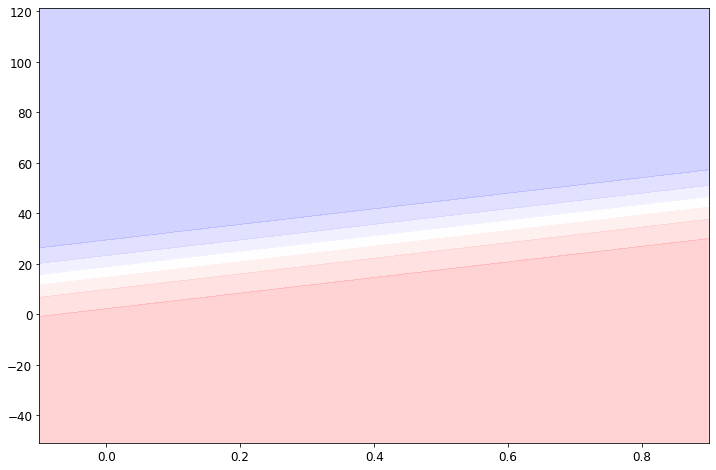

In [17]:
def plot_decision_boundary(model,X,y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) - 0.1
    hticks = np.linspace(amin,amax,101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab= np.c_[aa.ravel(), bb.ravel()]#flatten

    #make prediction
    c=model.predict(ab)
    Z=c.reshape(aa.shape)

    plt.figure(figsize=(12,8))
    # plot contour
    plt.contourf(aa,bb,Z, cmap='bwr', alpha =0.2 )
    return plt
plot_decision_boundary(model, data, labels)

##Building A Model

For simplicity, code examples from the next sections will mostly reference homework 4. Since this hasn't yet been graded, I have adapted it slightly to use VGG16 as the sample code for that homework did.

Reference: https://colab.research.google.com/drive/14tZ8owus8PmOwSCQvIrPQFWZKuVepjOa 

Reference 2 (HW4 sample code): https://colab.research.google.com/drive/1F-RWvoxH8MmT7c1UmNy41iuOp-ejiLoF 

There are several approaches to building a model, and the most efficient approaches depend on the goal that model is trying to achieve. The most useful method I learned in this class is building a model using a convnet, or a convolutional neural network. 

In Keras, the method of building the model involves stacking the layers of the model and building the frame of the model. A "built" model isn't necessarily trained, and may or may not have any actual previously changed weights to aid it for the job it is going to be assigned to do. 

**Pretrained convnets** such as MobileNetV2, VGG16, and InceptionV2 all exist (primarily for image recognition) as convnets to aid in image processing and recognition. To use these effectively, they should be treated as a layer of a model (although this layer may be made up of several hundred other layers). 

**Convolutional neural networks** (CNNs) receive an input which represents an image, and this image is some shape in a three dimensional matrix that represents RGB for coloration. 

CNN's have a structure made of stacks of modules, and these modules perform three operations. The operations are: $$(convolution + ReLU + pooling)m1 ⇒ (convolution + ReLU + pooling)m2 ⇒ .. ⇒ (convolution + ReLU + pooling)mn ⇒ Classification = output $$

Each module performs convolution and ReLu as well as a max pooling operation on whatever shape was inserted into it based on the previous layer's shape. 

**Convolution** - A convolution involves an input matrix and a filter matrix. The filters are effectively put on top of the input matrix both horizontally and vertically, one square (or pixel, when talking about images), at a time. This extracts each tile of the image. 


**ReLU** - Following convolution, a Recified Linear Unit transformation is applied onto the convolved feature. ReLU is essentially $$ReLU(x) = max(0,x)$$ which returns $x$ for all values $x>0$ and $0$ for all values $x<=0$.

**Max Pooling/Pooling** - The purpose of pooling is to downsample the convolved feature and decrease processing time. Max pooling is commonly used for this. In max pooling, filters are slid over the matrix to help extract all non-overlapping 2x2 tiles on the feature map.

###Code Example: Homework 4 #3 pt 1

**Building a model using a pretrained convnet**

####Prereq Code

In [18]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-04-24 20:34:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   118MB/s    in 0.6s    

2020-04-24 20:34:59 (118 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

####Loading a Pretrained Convnet and Building a Model

In [21]:
#####LOAD PRETRAINED CONV_BASE VGG16#####
from keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

#####SET AS NON TRAINABLE FOR LATER USE IN FINE TUNING#####
conv_base.trainable = False

58892288/58889256 [==============================] - 2s 0us/step


In [22]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


##Comping A Model

The two most important things to understand while compiling a model are learning rates and optimizers.

**Optimizers** are what determine how networks will be updated based on loss, in other words, the variant of stachastic gradient descent that will be applied onto the network based on changing loss for each step (1). There are several types of optimizers, one of the most common that was used in this class was rmsprop (2). RMSprop divides the gradient by running an average of its recent magnitude (3).
Ref 1: https://github.com/schneider128k/machine_learning_course/blob/master/keras_basics.md
Ref 2: https://keras.io/optimizers/
Ref 3: http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf 

**Learning Rates** are a value that which the gradients are multiplied by to determine the next point while performing gradient descent. Learning rates are **hyperparameters**, which means they are external to the model itself. Small learning rates will cause gradient descent to take too long, but large learning rates will cause overshooting and make the next step go past the actual minimum.

Ref: https://github.com/schneider128k/machine_learning_course/blob/master/slides/2_e_slides.pdf


Code Reference: https://colab.research.google.com/drive/14tZ8owus8PmOwSCQvIrPQFWZKuVepjOa 

Code Reference 2 (HW4 sample code): https://colab.research.google.com/drive/1F-RWvoxH8MmT7c1UmNy41iuOp-ejiLoF 

####Prerequisite Code

In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


####Compiling A Model Code (HW4 #3 Pt 1)


In [0]:
#####In this model compilation, lr is set to 2e-5, and the optimizer used is RMSprop

# compile model
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])


##Training A Model

Training a model is very simple using Keras, as I previously mentioned. For this, we use model.fit_generator() to fit our generated data to both train and validate the models training. Validation gives a wonderful insight on whether the model is overfitting or underfitting.

**Overfitting** is something that occurs when a model overfits to the peculiarities of some given training data. This means the introduction of new data could be very poorly represented as the model has learned some unintentional pattern in the training data rather than the actual pattern. Overfitting occurs when a model is made too complex. When a model does approximately as well splitting up the training data as it does testing data, it is not overfitting.

Ref: https://github.com/schneider128k/machine_learning_course/blob/master/slides/5_slides.pdf 

**Underfitting** is prevalent in models that have been trained in a way that has made them non-flexible, and cannot or have trouble accepting new data properly.

Ref: https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765

In [25]:
#####TRAIN THE MODEL#####

##NOTE THIS CODE STARTS TAKING A LONG TIME TO RUN FROM HERE ON OUT##

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 22s 216ms/step - loss: 0.5940 - acc: 0.6940 - val_loss: 0.3980 - val_acc: 0.8310
Epoch 2/30
100/100 [==============================] - 17s 165ms/step - loss: 0.4786 - acc: 0.7865 - val_loss: 0.3933 - val_acc: 0.8390
Epoch 3/30
100/100 [==============================] - 17s 165ms/step - loss: 0.4289 - acc: 0.8060 - val_loss: 0.5091 - val_acc: 0.8500
Epoch 4/30
100/100 [==============================] - 17s 167ms/step - loss: 0.3945 - acc: 0.8255 - val_loss: 0.3691 - val_acc: 0.8560
Epoch 5/30
100/100 [==============================] - 17s 166ms/step - loss: 0.3751 - acc: 0.8440 - val_loss: 0.2927 - val_acc: 0.8570
Epoch 6/30
100/100 [==============================] - 17s 167ms/step - loss: 0.3697 - acc: 0.8385 - val_loss: 0.4261 - val_acc: 0.8680
Epoch 7/30
100/100 [==============================] - 17s 167ms/step - loss: 0.3524 - acc: 0.8445 - val_loss: 0.4674 - val_acc: 0.8770
Epoch 8/30
100/100 [==============================] - 1

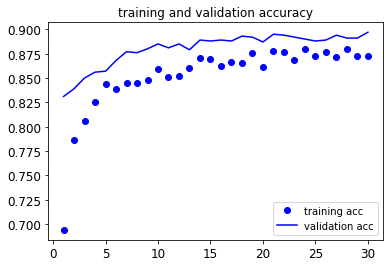

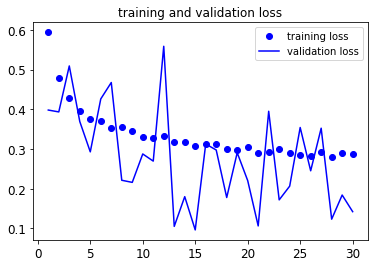

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

##Finetuning A Model

Finetuning is done on a model that has one or more pretrained components, and can be done to improve results, reduce overfitting, reduce underfitting, and overall increase the effectiveness of the model created.

Finetuning is extremely useful and allows a developer to quickly improve the results of a model, assuming the developer has an understanding of the pretrained model. 

Generally, fine tuning the upper layers allows us to retrain the non-generalize image reading layers and the more specific layers to recognize whatever the images may be. The lower a layer is, the more general it is, and the higher a layer is, the more specific it is.

Ref: https://www.tensorflow.org/tutorials/images/transfer_learning


Often to get the most efficiently fine tuned model it will take several attempts and you will need to factor overfitting, underfitting, and also the accuracy and loss of the models. 

When finetuning a pretrained convolutional network, you select and unfreeze some amount of layers to allow more specific layers to be retrained, while keeping general image recognition layers frozen and taking advantage of the pretrained data in them.\

Code Reference: https://colab.research.google.com/drive/14tZ8owus8PmOwSCQvIrPQFWZKuVepjOa

Code Reference 2 (HW4 sample code): https://colab.research.google.com/drive/1F-RWvoxH8MmT7c1UmNy41iuOp-ejiLoF

In [29]:
#####UNFREEZE PREVIOUSLY FROZEN CONVNET#####
conv_base.trainable = True

print("Number of layers in the base model: ", len(conv_base.layers))

# Fine-tune from this layer onwards
fine_tune_at = 10

for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  19


In [30]:
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 18s 182ms/step - loss: 0.2516 - acc: 0.8975 - val_loss: 0.4103 - val_acc: 0.8960
Epoch 2/100
100/100 [==============================] - 17s 165ms/step - loss: 0.2370 - acc: 0.9070 - val_loss: 0.1537 - val_acc: 0.8990
Epoch 3/100
100/100 [==============================] - 16s 165ms/step - loss: 0.2600 - acc: 0.8925 - val_loss: 0.6304 - val_acc: 0.8940
Epoch 4/100
100/100 [==============================] - 16s 165ms/step - loss: 0.2578 - acc: 0.8830 - val_loss: 0.1857 - val_acc: 0.8970
Epoch 5/100
100/100 [==============================] - 17s 166ms/step - loss: 0.2556 - acc: 0.8995 - val_loss: 0.0997 - val_acc: 0.8980
Epoch 6/100
100/100 [==============================] - 16s 165ms/step - loss: 0.2574 - acc: 0.8885 - val_loss: 0.1566 - val_acc: 0.8930
Epoch 7/100
100/100 [==============================] - 16s 165ms/step - loss: 0.2729 - acc: 0.8815 - val_loss: 0.1927 - val_acc: 0.8990
Epoch 8/100
100/100 [===========================

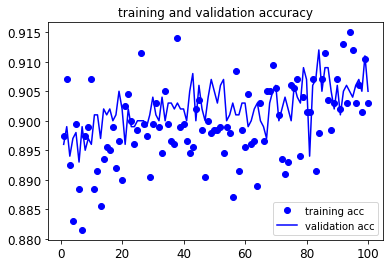

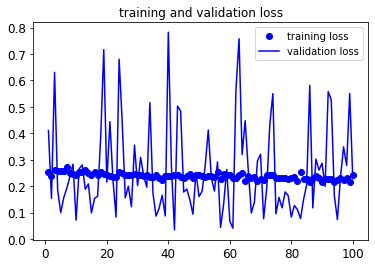

In [31]:
###Graph training/validation acc and loss

%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [32]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.24243417382240295
Validation accuracy: 0.9049999713897705
